In [4]:
import json
data = []
try:
    with open('converted_dataset_clean.json', 'r') as file:
        data = json.load(file)
    print(f"Total entries parsed: {len(data)}")
    print("First 5 entries:", data[:5])
except json.JSONDecodeError as e:
    print(f"Error parsing file: {e}")

Total entries parsed: 2541
First 5 entries: [{'input': 'CV section: Financial Accountant specializing in financial planning, reporting, and analysis within the Department of Defense.', 'output': 'Please give a brief introduction about yourself based on your CV.'}, {'input': 'CV section: Associate in Accounting, Northern Maine Community College, 1994, GPA: 3.41; Attended Hudson College, major in Accounting, 78 semester hours toward Bachelor’s degree; Professional Military Comptroller School, 6 weeks, 1998; Certified Defense Financial Manager, CDFM, May 2005.', 'output': 'What educational qualifications do you have in accounting?'}, {'input': 'Question: What educational qualifications do you have in accounting?\nAnswer: I have an Associate in Accounting from Northern Maine Community College with a GPA of 3.41, 78 semester hours toward a Bachelor’s in Accounting from Hudson College, and a Certified Defense Financial Manager certification from 2005.', 'label': 'correct'}, {'input': 'Questi

In [5]:
!pip3 install scikit-learn


In [6]:
from sklearn.model_selection import train_test_split
classification_data = []
for entry in data:
    if isinstance(entry, dict) and "input" in entry and "label" in entry:
        if "Question:" in entry["input"] and "Answer:" in entry["input"]:
            input_text = entry["input"]
            label = 1 if entry["label"] == "correct" else 0
            classification_data.append({"text": input_text, "label": label})
print(f"Classification entries found: {len(classification_data)}")
if len(classification_data) == 0:
    print("No classification entries found. Printing sample entries for debugging:")
    print(data[:10])
    raise ValueError("No valid classification entries found. Check dataset structure.")
train_data, val_data = train_test_split(classification_data, test_size=0.2, random_state=42)
print(f"Training entries: {len(train_data)}, Validation entries: {len(val_data)}")

Classification entries found: 1680
Training entries: 1344, Validation entries: 336


In [7]:
!pip3 install transformers datasets

In [8]:
import transformers
import datasets
print("Libraries installed successfully")

Libraries installed successfully


In [9]:
from transformers import BertTokenizer
from datasets import Dataset
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
def tokenize_function(examples):
    return tokenizer(examples['text'], padding="max_length", truncation=True, max_length=512)
train_dataset = Dataset.from_list(train_data)
val_dataset = Dataset.from_list(val_data)
tokenized_train = train_dataset.map(tokenize_function, batched=True)
tokenized_val = val_dataset.map(tokenize_function, batched=True)

Map:   0%|          | 0/1344 [00:00<?, ? examples/s]

Map:   0%|          | 0/336 [00:00<?, ? examples/s]

In [10]:
print(f"Training dataset size: {len(train_dataset)}")
print(f"Validation dataset size: {len(val_dataset)}")

Training dataset size: 1344
Validation dataset size: 336


In [11]:
with open('converted_dataset_clean.json', 'r') as file:
    lines = file.readlines()
print("First 10 lines of the file:")
for i, line in enumerate(lines[:10], 1):
    print(f"Line {i}: {line.strip()[:100]}...")
print(f"Total lines in file: {len(lines)}")

First 10 lines of the file:
Line 1: [...
Line 2: {...
Line 3: "input": "CV section: Financial Accountant specializing in financial planning, reporting, and analys...
Line 4: "output": "Please give a brief introduction about yourself based on your CV."...
Line 5: },...
Line 6: {...
Line 7: "input": "CV section: Associate in Accounting, Northern Maine Community College, 1994, GPA: 3.41; At...
Line 8: "output": "What educational qualifications do you have in accounting?"...
Line 9: },...
Line 10: {...
Total lines in file: 10171


In [12]:
import json
data = []
try:
    with open('converted_dataset_clean.json', 'r') as file:
        data = json.load(file)
    print(f"Total entries parsed: {len(data)}")
    print("First 5 entries:", data[:5])
except json.JSONDecodeError as e:
    print(f"Error parsing as single JSON: {e}")

Total entries parsed: 2541
First 5 entries: [{'input': 'CV section: Financial Accountant specializing in financial planning, reporting, and analysis within the Department of Defense.', 'output': 'Please give a brief introduction about yourself based on your CV.'}, {'input': 'CV section: Associate in Accounting, Northern Maine Community College, 1994, GPA: 3.41; Attended Hudson College, major in Accounting, 78 semester hours toward Bachelor’s degree; Professional Military Comptroller School, 6 weeks, 1998; Certified Defense Financial Manager, CDFM, May 2005.', 'output': 'What educational qualifications do you have in accounting?'}, {'input': 'Question: What educational qualifications do you have in accounting?\nAnswer: I have an Associate in Accounting from Northern Maine Community College with a GPA of 3.41, 78 semester hours toward a Bachelor’s in Accounting from Hudson College, and a Certified Defense Financial Manager certification from 2005.', 'label': 'correct'}, {'input': 'Questi

In [13]:
from sklearn.model_selection import train_test_split
classification_data = []
for entry in data:
    if isinstance(entry, dict) and "input" in entry and "label" in entry:
        if "Question:" in entry["input"] and "Answer:" in entry["input"]:
            input_text = entry["input"]
            label = 1 if entry["label"] == "correct" else 0
            classification_data.append({"text": input_text, "label": label})
print(f"Classification entries found: {len(classification_data)}")
if len(classification_data) == 0:
    print("No classification entries found. Printing sample entries for debugging:")
    print(data[:10])
    raise ValueError("No valid classification entries found.")
train_data, val_data = train_test_split(classification_data, test_size=0.2, random_state=42)
print(f"Training entries: {len(train_data)}, Validation entries: {len(val_data)}")

# Check class balance
from collections import Counter
labels = [entry["label"] for entry in classification_data]
print("Label distribution:", Counter(labels))

Classification entries found: 1680
Training entries: 1344, Validation entries: 336
Label distribution: Counter({1: 840, 0: 840})


In [14]:
from transformers import BertTokenizer
from datasets import Dataset
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
def tokenize_function(examples):
    return tokenizer(examples['text'], padding="max_length", truncation=True, max_length=512)
train_dataset = Dataset.from_list(train_data)
val_dataset = Dataset.from_list(val_data)
tokenized_train = train_dataset.map(tokenize_function, batched=True)
tokenized_val = val_dataset.map(tokenize_function, batched=True)
print(f"Training dataset size: {len(tokenized_train)}")
print(f"Validation dataset size: {len(tokenized_val)}")

Map:   0%|          | 0/1344 [00:00<?, ? examples/s]

Map:   0%|          | 0/336 [00:00<?, ? examples/s]

Training dataset size: 1344
Validation dataset size: 336


In [15]:
!pip3 install torch torchvision torchaudio
import torch
print(f"PyTorch version: {torch.__version__}")
print(f"MPS available: {torch.backends.mps.is_available()}")

PyTorch version: 2.7.1
MPS available: True


In [17]:
!pip3 install ipywidgets
import ipywidgets
print(f"ipywidgets version: {ipywidgets.__version__}")

ipywidgets version: 8.1.7


In [20]:
import json
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer
from datasets import Dataset

# Parse data
with open('converted_dataset_clean.json', 'r') as file:
    data = json.load(file)
print(f"Total entries parsed: {len(data)}")

# Filter classification entries
classification_data = []
for entry in data:
    if isinstance(entry, dict) and "input" in entry and "label" in entry:
        if "Question:" in entry["input"] and "Answer:" in entry["input"]:
            input_text = entry["input"]
            label = 1 if entry["label"] == "correct" else 0
            classification_data.append({"text": input_text, "label": label})
print(f"Classification entries found: {len(classification_data)}")
if len(classification_data) == 0:
    print("No classification entries found. Printing sample entries:")
    print(data[:10])
    raise ValueError("No valid classification entries found.")

# Split data
train_data, val_data = train_test_split(classification_data, test_size=0.2, random_state=42)
print(f"Training entries: {len(train_data)}, Validation entries: {len(val_data)}")

# Check class balance
from collections import Counter
labels = [entry["label"] for entry in classification_data]
print("Label distribution:", Counter(labels))

# Tokenize
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
def tokenize_function(examples):
    return tokenizer(examples['text'], padding="max_length", truncation=True, max_length=512)
train_dataset = Dataset.from_list(train_data)
val_dataset = Dataset.from_list(val_data)
tokenized_train = train_dataset.map(tokenize_function, batched=True)
tokenized_val = val_dataset.map(tokenize_function, batched=True)
print(f"Training dataset size: {len(tokenized_train)}")
print(f"Validation dataset size: {len(tokenized_val)}")

Total entries parsed: 2541
Classification entries found: 1680
Training entries: 1344, Validation entries: 336
Label distribution: Counter({1: 840, 0: 840})


Map:   0%|          | 0/1344 [00:00<?, ? examples/s]

Map:   0%|          | 0/336 [00:00<?, ? examples/s]

Training dataset size: 1344
Validation dataset size: 336


In [21]:
import sys
print(sys.executable)  # Should be /Library/Frameworks/Python.framework/Versions/3.13/bin/python3.13

/Users/dasunsathsara/VVH/FinalYearProject-SmartHire-Backend/.venv/bin/python


In [24]:
!pip3 install torch torchvision torchaudio


In [25]:
!pip3 install --upgrade transformers


In [26]:
!pip3 install --upgrade accelerate

In [ ]:
import os
import time
os.environ["WANDB_DISABLED"] = "true"
from transformers import BertForSequenceClassification, Trainer, TrainingArguments
import evaluate
import numpy as np
import torch

# Set device
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
print(f"Using device: {device}")

# Load accuracy metric
accuracy_metric = evaluate.load("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return accuracy_metric.compute(predictions=predictions, references=labels)

# Initialize model
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)
model.to(device)

# Training arguments
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    learning_rate=2e-5,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    eval_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
)

# Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_val,
    compute_metrics=compute_metrics,
)

# Train with timing
start_time = time.time()
trainer.train()
end_time = time.time()
training_time = end_time - start_time
print(f"Total training time: {training_time // 60:.0f} minutes {training_time % 60:.2f} seconds")

In [27]:
eval_results = trainer.evaluate()
print("Final Evaluation Results:", eval_results)

NameError: name 'trainer' is not defined

In [ ]:
log_history = trainer.state.log_history
val_accuracy = []
epochs = []
for log in log_history:
    if 'eval_accuracy' in log and 'epoch' in log:
        val_accuracy.append(log['eval_accuracy'])
        epochs.append(log['epoch'])
print("Epochs:", epochs)
print("Validation Accuracy:", val_accuracy)

In [ ]:
model.save_pretrained('./trained_model')
tokenizer.save_pretrained('./trained_model')
import shutil
shutil.make_archive('trained_model', 'zip', './trained_model')
from IPython.display import FileLink
display(FileLink('trained_model.zip'))

In [58]:
from collections import Counter
try:
    train_labels = [entry["label"] for entry in tokenized_train]
    val_labels = [entry["label"] for entry in tokenized_val]
    print("Training label distribution:", Counter(train_labels))
    print("Validation label distribution:", Counter(val_labels))
except NameError:
    print("Tokenized datasets not defined. Re-run tokenization (Step 3).")

Training label distribution: Counter({0: 675, 1: 669})
Validation label distribution: Counter({1: 171, 0: 165})


In [59]:
try:
    print("Sample training entry:", tokenized_train[0])
    print("Sample validation entry:", tokenized_val[0])
except NameError:
    print("Tokenized datasets not defined. Re-run tokenization (Step 3).")

Sample training entry: {'text': 'Question: Can you describe how you supported NASA mission-based reporting activities and the skills you applied?\nAnswer: I delegated reporting tasks to others without direct involvement.', 'label': 0, 'input_ids': [101, 3160, 1024, 2064, 2017, 6235, 2129, 2017, 3569, 9274, 3260, 1011, 2241, 7316, 3450, 1998, 1996, 4813, 2017, 4162, 1029, 3437, 1024, 1045, 11849, 2094, 7316, 8518, 2000, 2500, 2302, 3622, 6624, 1012, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [60]:
import json
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer
from datasets import Dataset

# Parse data
with open('converted_dataset_clean.json', 'r') as file:
    data = json.load(file)
print(f"Total entries parsed: {len(data)}")

# Filter classification entries
classification_data = []
for entry in data:
    if isinstance(entry, dict) and "input" in entry and "label" in entry:
        if "Question:" in entry["input"] and "Answer:" in entry["input"]:
            input_text = entry["input"]
            label = 1 if entry["label"] == "correct" else 0
            classification_data.append({"text": input_text, "label": label})
print(f"Classification entries found: {len(classification_data)}")
if len(classification_data) == 0:
    print("No classification entries found. Printing sample entries:")
    print(data[:10])
    raise ValueError("No valid classification entries found.")

# Split data
train_data, val_data = train_test_split(classification_data, test_size=0.2, random_state=42)
print(f"Training entries: {len(train_data)}, Validation entries: {len(val_data)}")

# Check class balance
from collections import Counter
labels = [entry["label"] for entry in classification_data]
print("Label distribution:", Counter(labels))

# Tokenize
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
def tokenize_function(examples):
    return tokenizer(examples['text'], padding="max_length", truncation=True, max_length=512)
train_dataset = Dataset.from_list(train_data)
val_dataset = Dataset.from_list(val_data)
tokenized_train = train_dataset.map(tokenize_function, batched=True)
tokenized_val = val_dataset.map(tokenize_function, batched=True)
print(f"Training dataset size: {len(tokenized_train)}")
print(f"Validation dataset size: {len(tokenized_val)}")

Total entries parsed: 2541
Classification entries found: 1680
Training entries: 1344, Validation entries: 336
Label distribution: Counter({1: 840, 0: 840})


loading file vocab.txt from cache at /Users/dasunsathsara/.cache/huggingface/hub/models--bert-base-uncased/snapshots/86b5e0934494bd15c9632b12f734a8a67f723594/vocab.txt
loading file added_tokens.json from cache at None
loading file special_tokens_map.json from cache at None
loading file tokenizer_config.json from cache at /Users/dasunsathsara/.cache/huggingface/hub/models--bert-base-uncased/snapshots/86b5e0934494bd15c9632b12f734a8a67f723594/tokenizer_config.json
loading file tokenizer.json from cache at /Users/dasunsathsara/.cache/huggingface/hub/models--bert-base-uncased/snapshots/86b5e0934494bd15c9632b12f734a8a67f723594/tokenizer.json
loading file chat_template.jinja from cache at None
loading configuration file config.json from cache at /Users/dasunsathsara/.cache/huggingface/hub/models--bert-base-uncased/snapshots/86b5e0934494bd15c9632b12f734a8a67f723594/config.json
Model config BertConfig {
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "cl

Map:   0%|          | 0/1344 [00:00<?, ? examples/s]

Map:   0%|          | 0/336 [00:00<?, ? examples/s]

Training dataset size: 1344
Validation dataset size: 336


In [72]:
import os
import time
os.environ["WANDB_DISABLED"] = "true"
from transformers import BertForSequenceClassification, Trainer, TrainingArguments
import evaluate
import numpy as np
import torch
from sklearn.utils.class_weight import compute_class_weight

# Set device
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
print(f"Using device: {device}")

# Load accuracy metric
accuracy_metric = evaluate.load("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return accuracy_metric.compute(predictions=predictions, references=labels)

# Compute class weights
try:
    train_labels = [entry["label"] for entry in tokenized_train]
    class_weights = compute_class_weight('balanced', classes=np.array([0, 1]), y=train_labels)
    class_weights = torch.tensor(class_weights, dtype=torch.float).to(device)
    print("Class weights:", class_weights)
except NameError:
    print("Tokenized datasets not defined. Run Step 2.")
    raise

# Custom Trainer for class weights
class WeightedTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False, num_items_in_batch=None):
        labels = inputs.get("labels")
        outputs = model(**inputs)
        logits = outputs.get("logits")
        loss_fct = torch.nn.CrossEntropyLoss(weight=class_weights)
        loss = loss_fct(logits.view(-1, self.model.config.num_labels), labels.view(-1))
        return (loss, outputs) if return_outputs else loss

# Initialize model
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)
model.to(device)

# Training arguments
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=20,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    learning_rate=1e-5,
    warmup_steps=100,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    eval_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
)

# Initialize Trainer
trainer = WeightedTrainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_val,
    compute_metrics=compute_metrics,
)

# Train with timing
start_time = time.time()
trainer.train()
end_time = time.time()
training_time = end_time - start_time
print(f"Total training time: {training_time // 60:.0f} minutes {training_time % 60:.2f} seconds")

Using device: mps
Class weights: tensor([0.9956, 1.0045], device='mps:0')


loading configuration file config.json from cache at /Users/dasunsathsara/.cache/huggingface/hub/models--bert-base-uncased/snapshots/86b5e0934494bd15c9632b12f734a8a67f723594/config.json
Model config BertConfig {
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.53.3",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

loading weights file model.safetensors from cache at /Users/dasunsathsara/.cache/huggingface/hub/models--bert-base-uncased/snapshots/86b5e0934494bd15c9632b12f734a8a67f723594/model.safetensors
S

Epoch,Training Loss,Validation Loss,Accuracy
1,0.108000,0.058570,0.979167
2,0.078400,0.014393,0.991071
3,0.000800,0.079613,0.988095
4,0.059600,0.094478,0.982143
5,0.000300,0.042178,0.991071
6,0.000200,0.081808,0.988095
7,0.000200,0.118196,0.985119
8,0.000200,0.112763,0.985119
9,0.000100,0.125487,0.985119
10,0.000100,0.128001,0.985119


The following columns in the Evaluation set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.

***** Running Evaluation *****
  Num examples = 336
  Batch size = 8
Saving model checkpoint to ./results/checkpoint-168
Configuration saved in ./results/checkpoint-168/config.json
Model weights saved in ./results/checkpoint-168/model.safetensors
/Users/dasunsathsara/VVH/FinalYearProject-SmartHire-Backend/.venv/lib/python3.10/site-packages/torch/utils/data/dataloader.py:683: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)
The following columns in the Evaluation set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forwa

Total training time: 191 minutes 57.92 seconds


In [73]:
eval_results = trainer.evaluate()
print("Final Evaluation Results:", eval_results)

The following columns in the Evaluation set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.

***** Running Evaluation *****
  Num examples = 336
  Batch size = 8
/Users/dasunsathsara/VVH/FinalYearProject-SmartHire-Backend/.venv/lib/python3.10/site-packages/torch/utils/data/dataloader.py:683: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Final Evaluation Results: {'eval_loss': 0.014393378980457783, 'eval_accuracy': 0.9910714285714286, 'eval_runtime': 39.8831, 'eval_samples_per_second': 8.425, 'eval_steps_per_second': 1.053, 'epoch': 20.0}


In [74]:
log_history = trainer.state.log_history
val_accuracy = []
epochs = []
for log in log_history:
    if 'eval_accuracy' in log and 'epoch' in log:
        val_accuracy.append(log['eval_accuracy'])
        epochs.append(log['epoch'])
print("Epochs:", epochs)
print("Validation Accuracy:", val_accuracy)

Epochs: [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 20.0]
Validation Accuracy: [0.9791666666666666, 0.9910714285714286, 0.9880952380952381, 0.9821428571428571, 0.9910714285714286, 0.9880952380952381, 0.9851190476190477, 0.9851190476190477, 0.9851190476190477, 0.9851190476190477, 0.9851190476190477, 0.9851190476190477, 0.9851190476190477, 0.9851190476190477, 0.9851190476190477, 0.9851190476190477, 0.9851190476190477, 0.9851190476190477, 0.9851190476190477, 0.9851190476190477, 0.9910714285714286]


In [75]:
model.save_pretrained('./trained_model')
tokenizer.save_pretrained('./trained_model')
import shutil
shutil.make_archive('trained_model', 'zip', './trained_model')
from IPython.display import FileLink
display(FileLink('trained_model.zip'))

Configuration saved in ./trained_model/config.json
Model weights saved in ./trained_model/model.safetensors
tokenizer config file saved in ./trained_model/tokenizer_config.json
Special tokens file saved in ./trained_model/special_tokens_map.json


/Users/dasunsathsara/VVH/FinalYearProject-SmartHire-Backend/app/trained_model.zip

In [77]:
import json
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer
from datasets import Dataset

# Parse data
with open('converted_dataset_clean.json', 'r') as file:
    data = json.load(file)
print(f"Total entries parsed: {len(data)}")

# Filter classification entries
classification_data = []
for entry in data:
    if isinstance(entry, dict) and "input" in entry and "label" in entry:
        if "Question:" in entry["input"] and "Answer:" in entry["input"]:
            input_text = entry["input"]
            label = 1 if entry["label"] == "correct" else 0
            classification_data.append({"text": input_text, "label": label})
print(f"Classification entries found: {len(classification_data)}")

# Split data
train_data, val_data = train_test_split(classification_data, test_size=0.2, random_state=42)
print(f"Training entries: {len(train_data)}, Validation entries: {len(val_data)}")

# Check class balance
from collections import Counter
labels = [entry["label"] for entry in classification_data]
print("Label distribution:", Counter(labels))

# Tokenize
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
def tokenize_function(examples):
    return tokenizer(examples['text'], padding="max_length", truncation=True, max_length=512)
train_dataset = Dataset.from_list(train_data)
val_dataset = Dataset.from_list(val_data)
tokenized_train = train_dataset.map(tokenize_function, batched=True)
tokenized_val = val_dataset.map(tokenize_function, batched=True)
print(f"Training dataset size: {len(tokenized_train)}")
print(f"Validation dataset size: {len(tokenized_val)}")

Total entries parsed: 2541
Classification entries found: 1680
Training entries: 1344, Validation entries: 336
Label distribution: Counter({1: 840, 0: 840})


loading file vocab.txt from cache at /Users/dasunsathsara/.cache/huggingface/hub/models--bert-base-uncased/snapshots/86b5e0934494bd15c9632b12f734a8a67f723594/vocab.txt
loading file added_tokens.json from cache at None
loading file special_tokens_map.json from cache at None
loading file tokenizer_config.json from cache at /Users/dasunsathsara/.cache/huggingface/hub/models--bert-base-uncased/snapshots/86b5e0934494bd15c9632b12f734a8a67f723594/tokenizer_config.json
loading file tokenizer.json from cache at /Users/dasunsathsara/.cache/huggingface/hub/models--bert-base-uncased/snapshots/86b5e0934494bd15c9632b12f734a8a67f723594/tokenizer.json
loading file chat_template.jinja from cache at None
loading configuration file config.json from cache at /Users/dasunsathsara/.cache/huggingface/hub/models--bert-base-uncased/snapshots/86b5e0934494bd15c9632b12f734a8a67f723594/config.json
Model config BertConfig {
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "cl

Map:   0%|          | 0/1344 [00:00<?, ? examples/s]

Map:   0%|          | 0/336 [00:00<?, ? examples/s]

Training dataset size: 1344
Validation dataset size: 336


In [78]:
eval_results = trainer.evaluate()
print("Final Evaluation Results:", eval_results)

The following columns in the Evaluation set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.

***** Running Evaluation *****
  Num examples = 336
  Batch size = 8
/Users/dasunsathsara/VVH/FinalYearProject-SmartHire-Backend/.venv/lib/python3.10/site-packages/torch/utils/data/dataloader.py:683: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)
2025-07-24 08:00:33.358 Python[91780:17791060] Error creating directory 
 The volume ‚ÄúMacintosh HD‚Äù is out of space. You can‚Äôt save the file ‚Äúmpsgraph-91780-2025-07-24_08_00_31-3963895706‚Äù because the volume ‚ÄúMacintosh HD‚Äù is out of space.


Final Evaluation Results: {'eval_loss': 0.014393378980457783, 'eval_accuracy': 0.9910714285714286, 'eval_runtime': 34.699, 'eval_samples_per_second': 9.683, 'eval_steps_per_second': 1.21, 'epoch': 20.0}


In [28]:
import json
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer
from datasets import Dataset

# Load data
with open('converted_dataset_clean.json', 'r') as file:
    data = json.load(file)
print(f"Total entries parsed: {len(data)}")

# Filter classification entries
classification_data = []
for entry in data:
    if isinstance(entry, dict) and "input" in entry and "label" in entry:
        if "Question:" in entry["input"] and "Answer:" in entry["input"]:
            input_text = entry["input"]
            label = 1 if entry["label"] == "correct" else 0
            classification_data.append({"text": input_text, "label": label})
print(f"Classification entries found: {len(classification_data)}")

# Split into train+val and test (60% train, 20% val, 20% test)
train_val_data, test_data = train_test_split(classification_data, test_size=0.2, random_state=42)
train_data, val_data = train_test_split(train_val_data, test_size=0.25, random_state=42)  # 0.25 * 0.8 = 0.2
print(f"Training entries: {len(train_data)}, Validation entries: {len(val_data)}, Test entries: {len(test_data)}")

# Tokenize test set
tokenizer = BertTokenizer.from_pretrained('./trained_model')
def tokenize_function(examples):
    return tokenizer(examples['text'], padding="max_length", truncation=True, max_length=512)
test_dataset = Dataset.from_list(test_data)
tokenized_test = test_dataset.map(tokenize_function, batched=True)
print(f"Test dataset size: {len(tokenized_test)}")

Total entries parsed: 2541
Classification entries found: 1680
Training entries: 1008, Validation entries: 336, Test entries: 336


Map:   0%|          | 0/336 [00:00<?, ? examples/s]

Test dataset size: 336


In [29]:
!pip install seaborn

In [30]:
import json
from datasets import Dataset
from sklearn.model_selection import train_test_split

with open('converted_dataset_clean.json', 'r') as file:
    data = json.load(file)
classification_data = [entry for entry in data if "label" in entry and "Question:" in entry["input"] and "Answer:" in entry["input"]]

new_examples = [
    {"input": "Question: What was a key collaboration challenge you faced, and how did you address it?\nAnswer: I used Docker to streamline team workflows.", "label": "correct"},
    {"input": "Question: How do you integrate backend APIs with front-end?\nAnswer: I used Spring Boot with React for integration.", "label": "correct"},
    {"input": "Question: How did you improve debugging efficiency?\nAnswer: I used automated testing with Selenium.", "label": "correct"},
    {"input": "Question: What was a key collaboration challenge you faced, and how did you address it?\nAnswer: I ignored team issues.", "label": "incorrect"},
    {"input": "Question: How do you integrate backend APIs with front-end?\nAnswer: I avoided API integration.", "label": "incorrect"},
    {"input": "Question: How did you improve debugging efficiency?\nAnswer: I didn’t use debugging tools.", "label": "incorrect"},
    # Add the new examples here
    {"input": "Question: How did you optimize database performance at your job?\nAnswer: I optimized PostgreSQL queries, reducing response times by 15%.", "label": "correct"},
    {"input": "Question: How did you optimize database performance at your job?\nAnswer: I ignored database optimization.", "label": "incorrect"},
    {"input": "Question: What tools did you use for version control?\nAnswer: I implemented Git to manage code versions effectively.", "label": "correct"},
    {"input": "Question: What tools did you use for version control?\nAnswer: I used manual file tracking instead of version control.", "label": "incorrect"},
    {"input": "Question: How did you improve application scalability?\nAnswer: I deployed applications using AWS Elastic Beanstalk.", "label": "correct"},
    {"input": "Question: How did you improve application scalability?\nAnswer: I avoided scalability enhancements.", "label": "incorrect"},
    {"input": "Question: How did you manage financial reporting challenges?\nAnswer: I automated financial reports using Excel macros.", "label": "correct"},
    {"input": "Question: How did you manage financial reporting challenges?\nAnswer: I relied on manual reporting without automation.", "label": "incorrect"},
    {"input": "Question: What strategies did you use to reduce budget variances?\nAnswer: I implemented variance analysis with SAP software.", "label": "correct"},
    {"input": "Question: What strategies did you use to reduce budget variances?\nAnswer: I ignored budget variance issues.", "label": "incorrect"},
    {"input": "Question: How did you ensure specimen integrity during collection?\nAnswer: I followed OSHA guidelines for aseptic techniques.", "label": "correct"},
    {"input": "Question: How did you ensure specimen integrity during collection?\nAnswer: I skipped proper collection protocols.", "label": "incorrect"},
    {"input": "Question: What methods did you use to train new phlebotomists?\nAnswer: I conducted hands-on training with HIPAA compliance.", "label": "correct"},
    {"input": "Question: What methods did you use to train new phlebotomists?\nAnswer: I provided no formal training.", "label": "incorrect"},
    {"input": "Question: How did you enhance user interface performance?\nAnswer: I optimized CSS and JavaScript for faster rendering.", "label": "correct"},
    {"input": "Question: How did you enhance user interface performance?\nAnswer: I used unoptimized code without improvements.", "label": "incorrect"},
    {"input": "Question: What approach did you take for cloud migration?\nAnswer: I used Azure to migrate workloads with zero downtime.", "label": "correct"},
    {"input": "Question: What approach did you take for cloud migration?\nAnswer: I avoided cloud migration entirely.", "label": "incorrect"}
]

classification_data.extend(new_examples)

# Split dataset
train_val_data, test_data = train_test_split(classification_data, test_size=0.2, random_state=42)
train_data, val_data = train_test_split(train_val_data, test_size=0.25, random_state=42)
print(f"Training entries: {len(train_data)}, Validation entries: {len(val_data)}, Test entries: {len(test_data)}")

def tokenize_function(examples):
    return tokenizer(examples['input'], padding="max_length", truncation=True, max_length=512)
tokenized_train = Dataset.from_list(train_data).map(tokenize_function, batched=True)
tokenized_val = Dataset.from_list(val_data).map(tokenize_function, batched=True)
tokenized_test = Dataset.from_list(test_data).map(tokenize_function, batched=True)

# Save updated dataset
with open('converted_dataset_clean_updated.json', 'w') as file:
    json.dump(classification_data, file, indent=2)

Training entries: 1022, Validation entries: 341, Test entries: 341


Map:   0%|          | 0/1022 [00:00<?, ? examples/s]

Map:   0%|          | 0/341 [00:00<?, ? examples/s]

Map:   0%|          | 0/341 [00:00<?, ? examples/s]

In [49]:
import json
from datasets import Dataset
from sklearn.model_selection import train_test_split

# Load the updated dataset
with open('converted_dataset_clean_updated.json', 'r') as file:
    classification_data = json.load(file)

# Convert string labels to integers
for entry in classification_data:
    entry["label"] = 1 if entry["label"] == "correct" else 0

# Split dataset
train_val_data, test_data = train_test_split(classification_data, test_size=0.2, random_state=42)
train_data, val_data = train_test_split(train_val_data, test_size=0.25, random_state=42)
print(f"Training entries: {len(train_data)}, Validation entries: {len(val_data)}, Test entries: {len(test_data)}")

def tokenize_function(examples):
    return tokenizer(examples['input'], padding="max_length", truncation=True, max_length=512)

tokenized_train = Dataset.from_list(train_data).map(tokenize_function, batched=True)
tokenized_val = Dataset.from_list(val_data).map(tokenize_function, batched=True)
tokenized_test = Dataset.from_list(test_data).map(tokenize_function, batched=True)

# Save the updated dataset with numeric labels (optional, for future use)
with open('converted_dataset_clean_updated_numeric.json', 'w') as file:
    json.dump(classification_data, file, indent=2)

Training entries: 1022, Validation entries: 341, Test entries: 341


Map:   0%|          | 0/1022 [00:00<?, ? examples/s]

Map:   0%|          | 0/341 [00:00<?, ? examples/s]

Map:   0%|          | 0/341 [00:00<?, ? examples/s]

In [52]:
from transformers import BertForSequenceClassification, Trainer, TrainingArguments
import torch
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
from sklearn.metrics import accuracy_score
import time

# Set device
device = torch.device("mps" if torch.backends.mps.is_available() else "cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Load model
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2, hidden_dropout_prob=0.2)
model.to(device)

# Compute class weights
train_labels = [example["label"].item() if isinstance(example["label"], torch.Tensor) else example["label"] for example in tokenized_train]
class_weights = compute_class_weight('balanced', classes=np.array([0, 1]), y=train_labels)
class_weights = torch.tensor(class_weights, dtype=torch.float).to(device)

# Define compute_metrics function
def compute_metrics(pred):
    labels = pred.label_ids
    preds = np.argmax(pred.predictions, axis=1)
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc}

# Custom Trainer with weighted loss
class WeightedTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False, **kwargs):
        labels = inputs.get("labels").to(device)
        inputs = {k: v.to(device) for k, v in inputs.items()}
        outputs = model(**inputs)
        logits = outputs.get("logits")
        loss_fct = torch.nn.CrossEntropyLoss(weight=class_weights)
        loss = loss_fct(logits.view(-1, self.model.config.num_labels), labels.view(-1))
        return (loss, outputs) if return_outputs else loss

# Training arguments
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=10,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    learning_rate=1e-5,
    warmup_steps=100,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=100,
    eval_strategy="steps",
    eval_steps=500,
    save_strategy="steps",
    save_steps=500,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",  # This now matches compute_metrics
    greater_is_better=True,
    dataloader_pin_memory=False
)

# Initialize trainer
trainer = WeightedTrainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_val,
    compute_metrics=compute_metrics
)

# Train with timing
start_time = time.time()
trainer.train()
end_time = time.time()

print(f"\nTraining completed in {(end_time - start_time):.2f} seconds.")


Using device: mps


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss,Validation Loss,Accuracy
500,0.042100,0.039562,0.985337
1000,0.004100,0.075778,0.982405



Training completed in 7927.43 seconds.


In [53]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluate on test set
test_results = trainer.evaluate(eval_dataset=tokenized_test)
print("Test Set Results:", test_results)

# Detailed metrics (optional)
predictions = trainer.predict(tokenized_test)
labels = predictions.label_ids
preds = np.argmax(predictions.predictions, axis=1)
print(f"Accuracy: {accuracy_score(labels, preds):.4f}")
print(f"Precision: {precision_score(labels, preds):.4f}")
print(f"Recall: {recall_score(labels, preds):.4f}")
print(f"F1 Score: {f1_score(labels, preds):.4f}")

Test Set Results: {'eval_loss': 0.10536162555217743, 'eval_accuracy': 0.9765395894428153, 'eval_runtime': 41.4419, 'eval_samples_per_second': 8.228, 'eval_steps_per_second': 1.038, 'epoch': 10.0}
Accuracy: 0.9765
Precision: 0.9811
Recall: 0.9689
F1 Score: 0.9750


In [55]:
import shutil
from IPython.display import FileLink

# Load best model (adjust path if needed)
best_checkpoint = './results/checkpoint-*'  # Replace with actual path from training
model.save_pretrained('./trained_model_retrained')
tokenizer.save_pretrained('./trained_model_retrained')

# Create zip for download
shutil.make_archive('trained_model_retrained', 'zip', './trained_model_retrained')
display(FileLink('trained_model_retrained.zip'))

/Users/dasunsathsara/VVH/FinalYearProject-SmartHire-Backend/app/trained_model_retrained.zip

In [57]:
from transformers import BertTokenizer, BertForSequenceClassification
import torch

# Load saved model
model_path = './trained_model_retrained'
model = BertForSequenceClassification.from_pretrained(model_path)
tokenizer = BertTokenizer.from_pretrained(model_path)
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
model.to(device)

# Example inference
text = "Question: How did you improve debugging efficiency?\nAnswer: I used IDE tools to streamline debugging."
inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512).to(device)
with torch.no_grad():
    outputs = model(**inputs)
probabilities = torch.softmax(outputs.logits, dim=-1).cpu().numpy()[0]
prediction = torch.argmax(outputs.logits, dim=-1).item()
print(f"Input: {text}")
print(f"Probabilities: P(incorrect)= {probabilities[0]:.4f}, P(correct)= {probabilities[1]:.4f}")
print(f"Prediction: {'correct' if prediction == 1 else 'incorrect'}")

Input: Question: How did you improve debugging efficiency?
Answer: I used IDE tools to streamline debugging.
Probabilities: P(incorrect)= 0.0016, P(correct)= 0.9984
Prediction: correct


In [64]:
from transformers import BertTokenizer, BertForSequenceClassification
import torch
from datasets import Dataset

# Load saved model and tokenizer
model_path = './trained_model_retrained'
model = BertForSequenceClassification.from_pretrained(model_path)
tokenizer = BertTokenizer.from_pretrained(model_path)
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
model.to(device)
model.eval()

print(f"Model loaded successfully on {device}")

# Prepare test examples
test_examples = [
    "Question: What was a key collaboration challenge you faced at WH Solutions, and how did you address it?\nAnswer: I faced challenges coordinating with the frontend team due to misaligned APIs, which I resolved by implementing Swagger for better API documentation.",
    "Question: How do you integrate backend APIs with front-end?\nAnswer: I use axios to connect React UIs with REST APIs.",
    "Question: How did you improve debugging efficiency?\nAnswer: I used IDE tools to streamline debugging.",
    "Question: What was your role at WH Solutions?\nAnswer: I was an Intern Software Engineer, working on full-stack application development.",  # Correct
    "Question: What was your role at WH Solutions?\nAnswer: I was a project manager overseeing software development."  # Incorrect
]

# Tokenize and batch the data
def tokenize_test(examples):
    return tokenizer(examples, padding="max_length", truncation=True, max_length=512, return_tensors="pt")

tokenized_test = Dataset.from_dict({"text": test_examples}).map(lambda x: tokenize_test(x["text"]), batched=True)
tokenized_test.set_format('torch', columns=['input_ids', 'attention_mask'])

# Move to device
inputs = {k: v.to(device) for k, v in tokenized_test[:].items() if k in ['input_ids', 'attention_mask']}

Model loaded successfully on mps


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

In [65]:
# Run inference on the batch
with torch.no_grad():
    outputs = model(**inputs)
probs = torch.softmax(outputs.logits, dim=-1).cpu().numpy()
preds = torch.argmax(outputs.logits, dim=-1).cpu().numpy()

# Display results
for i, (text, prob, pred) in enumerate(zip(test_examples, probs, preds)):
    print(f"Test Case {i + 1}:")
    print(f"Input: {text}")
    print(f"Probabilities: P(incorrect)= {prob[0]:.4f}, P(correct)= {prob[1]:.4f}")
    print(f"Prediction: {'correct' if pred == 1 else 'incorrect'}\n")

Test Case 1:
Input: Question: What was a key collaboration challenge you faced at WH Solutions, and how did you address it?
Answer: I faced challenges coordinating with the frontend team due to misaligned APIs, which I resolved by implementing Swagger for better API documentation.
Probabilities: P(incorrect)= 0.0027, P(correct)= 0.9973
Prediction: correct

Test Case 2:
Input: Question: How do you integrate backend APIs with front-end?
Answer: I use axios to connect React UIs with REST APIs.
Probabilities: P(incorrect)= 0.0023, P(correct)= 0.9977
Prediction: correct

Test Case 3:
Input: Question: How did you improve debugging efficiency?
Answer: I used IDE tools to streamline debugging.
Probabilities: P(incorrect)= 0.0016, P(correct)= 0.9984
Prediction: correct

Test Case 4:
Input: Question: What was your role at WH Solutions?
Answer: I was an Intern Software Engineer, working on full-stack application development.
Probabilities: P(incorrect)= 0.9698, P(correct)= 0.0302
Prediction: inco

In [73]:
!pip install pandas matplotlib seaborn
!pip install tabulate
!pip install openpyxl



Python(57115) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Python(57119) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Python(57120) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


  Obtaining dependency information for openpyxl from https://files.pythonhosted.org/packages/c0/da/977ded879c29cbd04de313843e76868e6e13408a94ed6b987245dc7c8506/openpyxl-3.1.5-py2.py3-none-any.whl.metadata
  Obtaining dependency information for et-xmlfile from https://files.pythonhosted.org/packages/c1/8b/5fe2cc11fee489817272089c4203e679c63b570a5aaeb18d852ae3cbba6a/et_xmlfile-2.0.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 706.5 kB/s eta 0:00:00a 0:00:01


In [69]:
import pandas as pd

# Prepare display data
results = []
for i, text in enumerate(test_examples):
    with torch.no_grad():
        encoded = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512).to(device)
        output = model(**encoded)
        probs = torch.softmax(output.logits, dim=-1).cpu().numpy()[0]
        pred = torch.argmax(output.logits, dim=-1).item()
        results.append({
            "Question + Answer": text,
            "Prediction": "correct" if pred == 1 else "incorrect",
            "P(correct)": round(probs[1], 4),
            "P(incorrect)": round(probs[0], 4)
        })

# Create DataFrame
df = pd.DataFrame(results)
display(df)  # If using Jupyter Notebook
print(df.to_markdown())  # CLI-friendly output


,Question + Answer,Prediction,P(correct),P(incorrect)
0,Question: What was a key collaboration challen...,correct,0.9973,0.0027
1,Question: How do you integrate backend APIs wi...,correct,0.9977,0.0023
2,Question: How did you improve debugging effici...,correct,0.9984,0.0016
3,Question: What was your role at WH Solutions?\...,incorrect,0.0302,0.9698
4,Question: What was your role at WH Solutions?\...,incorrect,0.0008,0.9992


|    | Question + Answer                                                                                                                                             | Prediction   |   P(correct) |   P(incorrect) |
|---:|:--------------------------------------------------------------------------------------------------------------------------------------------------------------|:-------------|-------------:|---------------:|
|  0 | Question: What was a key collaboration challenge you faced at WH Solutions, and how did you address it?                                                       | correct      |       0.9973 |         0.0027 |
|    | Answer: I faced challenges coordinating with the frontend team due to misaligned APIs, which I resolved by implementing Swagger for better API documentation. |              |              |                |
|  1 | Question: How do you integrate backend APIs with front-end?                                                                              

/var/folders/tm/rvfp5h494516qprtzvrwh8r00000gn/T/ipykernel_40844/246712404.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Prediction", palette="pastel")


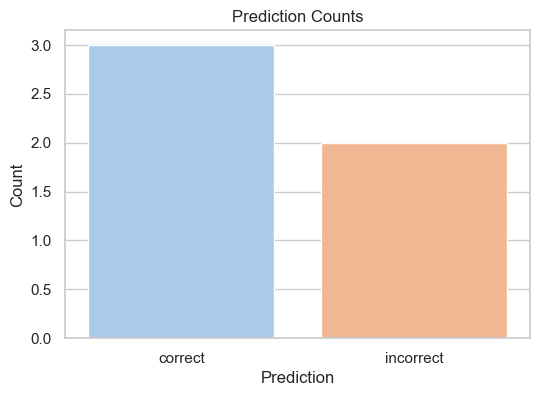

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count predictions
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="Prediction", palette="pastel")
plt.title("Prediction Counts")
plt.ylabel("Count")
plt.show()


<Figure size 1000x500 with 0 Axes>

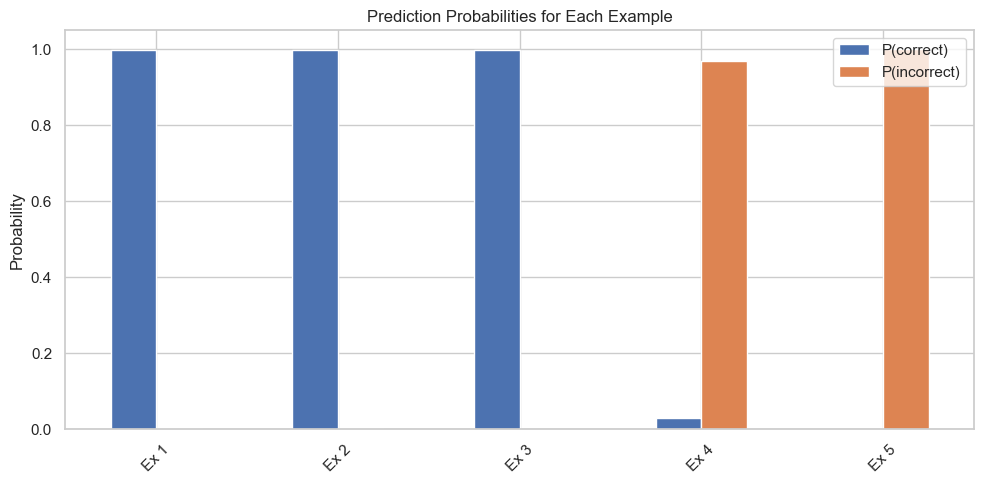

In [71]:
plt.figure(figsize=(10, 5))
df[["P(correct)", "P(incorrect)"]].plot(kind="bar", stacked=False, figsize=(10, 5))
plt.title("Prediction Probabilities for Each Example")
plt.xticks(ticks=range(len(df)), labels=[f"Ex {i+1}" for i in range(len(df))], rotation=45)
plt.ylabel("Probability")
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()


In [74]:
df.to_csv("model_predictions.csv", index=False)
# or
df.to_excel("model_predictions.xlsx", index=False)
